# Analysis included in our outline

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('../data/processed/pipeline_incidents_2010_present_all_CLEAN.csv')
df.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,operator_street_address,operator_city_name,operator_state_abbreviation,operator_postal_code,local_datetime,time_zone,daylight_savings_ind,iyear,location_street_address,location_city_name,location_county_name,location_state_abbreviation,location_postal_code,location_latitude,location_longitude,total_cost,total_cost_current,injury_ind,injure,num_pub_evacuated,fatal,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,year_dt,pipeline_age
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,"PG&E - GAS OPERATIONS, REGULATORY COMPLIANCE 6...",SAN RAMON,CA,94583,2/13/10 23:35,NaN,NaN,2010.0,1617 EAST 9TH STREET,STOCKTON,SAN JOAQUIN,CA,95201,37.93188,-121.26133,102500,124764.082311,NO,0,0.0,0,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPRO...,10.0,NaN,NaN,NaN,NaN
1,2/28/22,NO,NO,NO,20100002,15553,3/12/10,SUPPLEMENTAL FINAL,13730,NORTHERN INDIANA PUBLIC SERVICE CO,801 E 86TH AVENUE,MERRILLVILLE,IN,46410,2/16/10 10:38,NaN,NaN,2010.0,3835 SANDPIPER COVE RUN,SOUTH BEND,ST. JOSEPH,IN,46628,41.72931,-86.27531,57500,68334.121206,NO,0,20.0,0,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,"CONTRACTOR BORING ELECTRIC LINE PARALLEL TO 3""...",310.0,1990-01-01,1990-1999,1990.0,20.0


## Incidents by decade

In [3]:
df['installation_year'] = pd.to_datetime(df['installation_year'], format='%Y-%m-%d')

In [4]:
# split into decades
conditions = [
    (df['installation_year'] >= '1900-01-01') & (df['installation_year'] < '1910-01-01'),
    (df['installation_year'] >= '1910-01-01') & (df['installation_year'] < '1920-01-01'),
    (df['installation_year'] >= '1920-01-01') & (df['installation_year'] < '1930-01-01'),
    (df['installation_year'] >= '1930-01-01') & (df['installation_year'] < '1940-01-01'),
    (df['installation_year'] >= '1940-01-01') & (df['installation_year'] < '1950-01-01'),
    (df['installation_year'] >= '1950-01-01') & (df['installation_year'] < '1960-01-01'),
    (df['installation_year'] >= '1960-01-01') & (df['installation_year'] < '1970-01-01'),
    (df['installation_year'] >= '1970-01-01') & (df['installation_year'] < '1980-01-01'),
    (df['installation_year'] >= '1980-01-01') & (df['installation_year'] < '1990-01-01'),
    (df['installation_year'] >= '1990-01-01') & (df['installation_year'] < '2000-01-01'),
    (df['installation_year'] >= '2000-01-01') & (df['installation_year'] < '2010-01-01'),
    df['installation_year'] >= '2010-01-01'
]

outputs = [
    '1900-1909', '1910-1919', '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979',
    '1980-1989', '1990-1999', '2000-2009', '>2010'
]

df['decade'] = np.select(conditions, outputs, np.nan)
df.decade.unique()

array(['nan', '1990-1999', '1970-1979', '1980-1989', '1960-1969',
       '2000-2009', '1950-1959', '1940-1949', '>2010', '1920-1929',
       '1930-1939', '1900-1909', '1910-1919'], dtype=object)

In [5]:
# accidents with post 2010 installation year for how many accidents with ANY installation year that occurred post 2010
len(df[df.decade == '>2010'])/ len(df[df.iyear >= 2010])

# 20.5% of all accidents that occurred post 2010 had installation years after 2010

0.20469395919455927

## Overview of incidents

In [6]:
# Total cost adjusted for inflation
df['total_cost_current'].sum()

7994914265.472826

In [7]:
# Total injuries 
df.injure.sum()

716

In [8]:
# Total deaths
df.fatal.sum()

156

In [9]:
# Total incidents
df.shape

(7499, 41)

## Plot of incidents by pipeline age at time of incident

<AxesSubplot:>

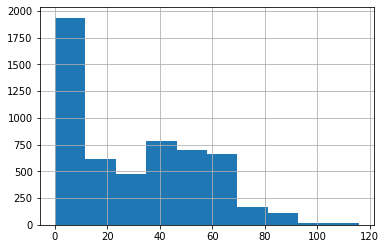

In [10]:
df.pipeline_age.hist()